
Unlike standard evaluation metrics that treat all classes as equally important, imbalanced classification  problems  typically  rate  classification  errors  with  the  minority  class  as  more important than those with the majority class.  As such performance metrics may be needed that focus on the minority class, which is made challenging because it is the minority class where we lack observations required to train an effective model.

### Taxonomy of classification metrics

There are tens of metrics to choose from when evaluating classifier models, and perhaps hundreds,if you consider all of the pet versions of metrics proposed by academics.  

In order to get a handle on the metrics that you could choose from, we will use a taxonomy proposed by Cesar Ferri,et al.  in their 2008 paper titled An Experimental Comparison Of Performance Measures For Classification.  It was also adopted in the 2013 book titledI mbalanced  Learning and I think proves useful. We can divide evaluation metrics into three useful groups; they are:

1.  Threshold Metrics
    - e.g. accuracy and f1 score
2.  Ranking Metrics
    - e.g. ROC and AUC
3.  Probability Metrics.
    - e.g. root mean squared error 

#### Threshold metrics

Threshold metrics are those that quantify the classification prediction errors.  That is, they are designed to summarize the fraction, ratio, or rate of when a predicted class does not match the expected class in a holdout dataset.

The most widely used threshold metrics is accuracy:

 $Accuracy = \frac{Correct Predictions}{Total Predictions}$     

and the complement the classification error:
    
 $Error  =  \frac{Incorrect Predictions}{Total Predictions} = 1 - Accuracy $

The Failure of Accuracy in imbalance learning context is usually translates in a model with no skill predicting no positive outcomes and still achieving a high accuracy results. 

Most threshold metrics can be best understood by the terms used in a confusion matrix for a binary (two-class) classification problem.  This does not mean that the metrics are limited for use on binary classification; it is just an easy way to quickly understand what is being measured.The confusion matrix provides more insight into not only the performance of a predictive model but also which classes are being predicted correctly, which incorrectly, and what type of errors are being made.  In this type of confusion matrix,  each cell in the table has a specific and well-understood name, summarized as follows:

|              | Positive Prediction | Negative Prediction |
|--------------|:-------------------:|--------------------:|
|Positive Class|   True Positive (TP)| False Negative (FN) |
|Negative Class|   False Positive(FP)| True Negative (TN)  |

#### Sensitivity-Specificity Metrics

Sensitivity or recall refers to the true positive rate and summarizes how well the positive class was predicted.

$ Recall = \frac{True Positives}{True Positives + False Negatives}$
    

Specificity is the complement to sensitivity, or the true negative rate, and summarises how well the negative class was predicted. 

$ Specificity= \frac{True Negatives}{True Negatives + False Positives}$
    
For imbalance classification the recall is usually more interesting than specificity. Sensitivity and Specificity can be combined into a single score called the G-Mean.

$ G-Mean = \sqrt[]{Sensitivity x Specificity}  $









### Tour of Model Evaluation Metrics

A classifier is only as good as the metric used to evaluate it. If you choose the wrong metric to
evaluate your models, you are likely to choose a poor model, or in the worst case, be misled
about the expected performance of your model. after completing this tutorial, you will know:

- About the challenge of choosing metrics for classification, and how it is particularly difficult
when there is a skewed class distribution.

- How there are three main types of metrics for evaluating classifier models, referred to as
rank, threshold, and probability.

- How to choose a metric for imbalanced classification if you don't know where to start.


### Calculate Precision with Scikit-Learn 


Precisions calculates the correct positive predictions our of all predictions. The precision score can be calculated using the `precision_score()` scikit-learn function. For example:

For a binary-class problem

- the case there are 100 positives and 10,000 negatives examples
- the model predicts 90 true positives and 30 false positives

...| Positive Pred  | Negative Pred
---|---|---|
**Positive class** (100)  |   TP(90)       |     FN(10)
**Negative class** (10000)|   FP(30)       |     TN(9970)

In [47]:
from sklearn.metrics import precision_score
from seaborn import set as sns_set
sns_set()

In [48]:
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y = act_pos + act_neg
# define predictions ( do not view it as sum of column; mre like pair-wise compariosn for precision calculation)
pred_pos = [0 for _ in range(10)] + [1 for _ in range(90)]  
pred_neg = [1 for _ in range(30)] + [0 for _ in range(9970)]
y_hat = pred_pos + pred_neg
precision = precision_score(y_true=y, y_pred=y_hat, average='binary')
print("Precision: {:.3f}".format(precision))

Precision: 0.750


Next, we can use the same function to calculate precision for the multiclass problem with
1:1:100, with 100 examples in each minority class and 10,000 in the majority class. 

A model predicts:
- 50 true positives and 20 false positives for class 1 and 
- 99 true positives and 51 false positives for class 2.


...| Positive class1 Pred  | Positive class2 Pred | Negative Pred
---|---|---|---|
**Positive class 1** (100)  |   TPc1(50) |     FPc2(50)| FNc1(0)
**Positive class 2** (100)  |   FPc1 (1)  | TPc2(99)| FNc2(0)    
**Negative class** (10000)  |  FPc1(20)  | FPc2(51)|  TN(9929)


When using the precision score() function for multiclass classification, it is important
to specify the minority classes via the labels argument and to set the average argument to `micro` to ensure the calculation is performed as we expect. The complete example is listed
below.

In [49]:
# define actual
act_pos1 = [1 for _ in range(100)]
act_pos2 = [2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y = act_pos1 + act_pos2 + act_neg
# define predictions
pred_pos1 = [0 for _ in range(50)] + [1 for _ in range(50)]
pred_pos2 = [0 for _ in range(1)] + [2 for _ in range(99)]
pred_neg = [1 for _ in range(20)] + [2 for _ in range(51)] + [0 for _ in range(9929)]
y_pred = pred_pos1 + pred_pos2 + pred_neg

precision = precision_score(y_true=y, y_pred=y_pred,labels=[1,2], average='micro')
print("Precision: {:.3f}".format(precision))

Precision: 0.677


### Calculating Recall with Scikit-Learn

Recall is a metric that quantifies the number of correct positive predictions made out of all
correct positive predictions that could have been made.

For Binary Classification:

- We can consider the case of a 1:100 imbalance with 100 and 10000 examples respectively
- a model predicts 90 true positives and 10 false negatives

...| Positive Pred  | Negative Pred
---|---|---|
**Positive class** (100)  |   TP(90)       |     FN(10)
**Negative class** (10000)|   FP(0)       |     TN(10000)

In [50]:
# calculates recall for th 1:100  dataset with 90 tp and 10 fn
# define actual
from sklearn.metrics import recall_score
act_pos = [ 1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y = act_pos + act_neg
# define predictions lined with actuals for recall calculation
pred_pos = [1 for _ in range(90)] + [0 for _ in range(10)]
pred_neg = [0 for _ in range(10000)]
y_hat = pred_pos + pred_neg
# calculate recall
recall = recall_score(y_true=y, y_pred=y_hat, average='binary')
recall

0.9

For Multi-class problem:

- We can consider the case of a 1:1:100 imbalance with 100 in each minority class and 10000 examples respectively
- a model predicts 77 true positives and 23 false negatives for class 1
- and 95 true positives and 5 false negatives for class 2. 

...| Positive class1 Pred  | Positive class2 Pred | Negative Pred
---|---|---|---|
**Positive class 1** (100)  |   TPc1(77) |     FPc2(0)| FNc1(23)
**Positive class 2** (100)  |   FPc1 (0)  | TPc2(95)| FNc2(5)    
**Negative class** (10000)  |  FPc1(0)  | FPc2(0)|  TN(10000)

In [51]:
# calculates recall for th 1:100  dataset with 90 tp and 10 fn
# define actual
act_pos1 = [ 1 for _ in range(100)]
act_pos2 = [ 2 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y = act_pos1 + act_pos2 + act_neg
# define predications
pred_pos1  = [1 for _ in range(77)] + [0 for _ in range(23)]
pred_pos2 = [2 for _ in range(95)] + [0 for _ in range(5)]
pred_neg = [0 for _ in range(10000)]
y_hat = pred_pos1 + pred_pos2 + pred_neg
recall = recall_score(y_true=y, y_pred=y_hat, labels=[1,2], average='micro')
recall

0.86

You may decide to use precision or recall on your imbalanced classification problem. **Maximizing
precision will minimize the number false positive errors, whereas maximizing the recall will
minimize the number of false negative errors.**

In imbalanced datasets, the goal is to improve recall without hurting precision (minimize type 2 errors, keep type 1 steady)
These goals, however, are often connected, since in order to increase the TP for
the minority class, the number of FP is also often increased, resulting in reduced
precision. 

*| Page 55, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.

### F-Measure

Classification accuracy is widely used because it is one single measure used to summarize model
performance. F-measure provides a way to combine both precision and recall into a single
measure that captures both properties. Alone, neither precision or recall tells the whole story. We can have excellent precision with
terrible recall, or alternately, terrible precision with excellent recall. F-measure provides a way
to express both concerns with a single score. The intuition for F-measure is that both measures are balanced in importance and that only a
good precision and good recall together result in a good F-measure.

... the F1-measure, which weights precision and recall equally, is the variant most
often used when learning from imbalanced data.

*Page 27, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.*

#### Calculating the F-Measure 

For a binary-class problem

- the case there are 100 positives and 10,000 negatives examples
- the model predicts 95 true positives and 55 false positives

...| Positive Pred  | Negative Pred
---|---|---|
**Positive class** (100)  |   TP(95)       |     FN()
**Negative class** (10000)|   FP(55)       |     TN(9945)

In [52]:
# calculates f1 for 1:100 dataset with 95tp, 5fn, 55fp
from sklearn.metrics import f1_score
# define actual
act_pos = [1 for _ in range(100)]
act_neg = [0 for _ in range(10000)]
y_true = act_pos + act_neg
# define predictions
pred_pos = [0 for _ in range(5)] + [1 for _ in range(95)]
pred_neg = [1 for _ in range(55)] + [0 for _ in range(9945)]
y_pred = pred_pos + pred_neg
# calculate score
score = f1_score(y_true, y_pred, average='binary')
print('F-measure: %.3f' % score)

F-measure: 0.760


## ROC curve and ROC AUC

An  ROC  curve  (or  receiver  operating  characteristic  curve)  is  a  plot  that  summarizes  the performance of a binary classification model on the positive class.  The x-axis indicates the False Positive Rate and the y-axis indicates the True Positive Rate.  The true positive rate is also referred to as the sensitivity or the recall.

$ TPR = \frac{True Positives}{True Positives + False Negatives}$

The x- axis indicates the False Positive rate (or 1- Specificity)

$ FPR = 1- Specificity= \frac{False Positives}{True Negatives + False Positives}$

We can think of the plot as the fraction of correct predictions for the positive class (y-axis)versus the fraction of errors for the negative class (x-axis).  Ideally, we want the fraction of correct positive class predictions to be 1 (top of the plot) and the fraction of incorrect negative class predictions to be 0 (left of the plot).  This highlights that the best possible classifier that achieves perfect skill is the top-left of the plot (coordinate 0,1).

A trade-off exists between the True Positive Rate and False Positive Rate, such that changing the threshold of classification will change the balance of predictions towards improving the True Positive Rate at the expense of False Positive Rate, or the reverse case.

By evaluating the true positive and false positives for different threshold values, a curve can be constructed that stretches from the bottom left to top right and bows toward the top left.  This curve is called the ROC curve.  A classifier that has no discriminative power between positive and negative classes will form a diagonal line between a False Positive Rate of 0 and a True Positive Rate of 0 (coordinate (0,0) or predict all negative class) to a False Positive Rate of 1 and a True Positive Rate of 1 (coordinate (1,1) or predict all positive class).  Models represented by points below this line have worse than no skill.

The curve provides a convenient diagnostic tool to investigate one classifier with different threshold values and the effect on the TruePositiveRate and FalsePositiveRate.  One might choose a threshold in order to bias the predictive behavior of a classification model.  It is a popular diagnostic tool for classifiers on balanced and imbalanced binary prediction problems alike because it is not biased to the majority or minority class.


### Calculating ROC curve wit Scikit learn

We can plot a ROC curve for a model in Python using the `roc_curve()` scikit-learn function.The function takes both the true outcomes (0,1) from the test set and the predicted probabilities for the 1 class.  The function returns the false positive rates **for each threshold, true positive rates for each threshold and thresholds.**

Most scikit-learn models can predict probabilities by calling the `predict_proba()`function.This will return the probabilities for each class, for each sample in a test set, e.g.  two numbers for each of the two classes in a binary classification problem.  The probabilities for the positive class can be retrieved as the second column in this array of probabilities.

 Logistic  Regression  model  is  a  good  model  for  demonstration  because  the  predicted probabilities are well-calibrated, as opposed to other machine learning models that are not developed  around  a  probabilistic  model.

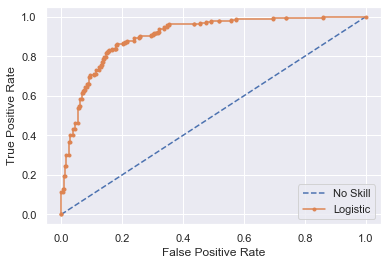

In [53]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

Running the example creates the synthetic dataset, splits into train and test sets, then fits aLogistic Regression model on the training dataset and uses it to make a prediction on the testset.  The ROC Curve for the Logistic Regression model is shown (orange with dots).  A no skillclassifier as a diagonal line (blue with dashes)

### ROC AUC

Although the ROC Curve is a helpful diagnostic tool, it can be challenging to compare two ormore classifiers based on their curves.  Instead, the area under the curve can be calculated togive a single score for a classifier model across all threshold values.  This is called the ROC areaunder curve or ROC AUC or sometimes ROCAUC. The score is a value between 0.0 and 1.0,with 1.0 indicating a perfect classifier. ROCAUC can be interpreted as the probability that the scores given by a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one.

The Auc can be calculated with `ROC_AUC()` score in scikit learn. Like the `roccurve()` function, the AUC function takes both the true outcomes (0,1) from thetest set and the predicted probabilities for the positive class.


In [54]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=1)
# no skill model, stratified random class predictions
model = DummyClassifier(strategy =  'stratified')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print("No skill ROC AUC {}".format(roc_auc))
# skilled model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
yhat = model.predict_proba(X_test)
pos_probs = yhat[:, 1]
roc_auc = roc_auc_score(y_test, pos_probs)
print("Log Regression ROC AUC {}".format(roc_auc))

No skill ROC AUC 0.4757744495647721
Log Regression ROC AUC 0.9106182795698926


In this case, we can see that the ROC AUC for the Logistic Regression model on the synthetic dataset is about 0.903, which is much better than a no skill classifier with a score of about 0.5.

Although widely used, the ROC AUC is not without problems.  For imbalanced classification with a severe skew and few examples of the minority class, the ROC AUC can be misleading. *This is because a small number of correct or incorrect predictions can result in a large change in the ROC Curve or ROC AUC score*

A common alternative is the precision-recall curve and area under curve.

### Precision recall curve

Precision is a metric that quantifies the number of correct positive predictions made.  It is calculated as the number of true positives divided by the total number of true positives and false positives. It can be understood as accuracy for the positive(minority) class, Of all positive predictions how many did i get right. 

$ Precision = \frac{True Positives}{True Positives + False Positives}$

Recall as above is the total number of actuals predictive positive of all actuals. 

$ Recall = \frac{True Positives}{True Positives + False Negatives}$

The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.  **Both the precision and the recall are focused on the positive class (the minority class) and are unconcerned with the true negatives (majority class)**

A model with perfect skill is depicted as a point at a coordinate of (1,1).  A skillful model is represented by a curve that bows towards a coordinate of (1,1).  A no-skill classifier will be a horizontal line on the plot with a precision that is proportional to the number of positive examples in the dataset.  For a balanced dataset this will be 0.5.  The focus of the PR curve on the minority class makes it an effective diagnostic for imbalanced binary classification models

*Precision-recall curves (PR curves) are recommended for highly skewed domainswhere ROC curves may provide an excessively optimistic view of the performance.*

A precision-recall curve can be calculated in scikit-learn using the `precisionrecallcurve()`function that takes the class labels and predicted probabilities for the minority class and returnsthe precision, recall, and thresholds.


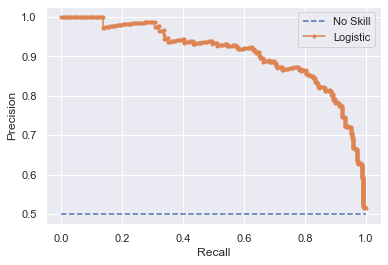

In [55]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5, random_state=1)
# fit Log Regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_hat = model.predict_proba(X_test)
# pos class only
pos_probs = y_hat[:,1]
# calculate the no skill line
no_skill = len(y[y == 1]) / len(y) # balanced dataset 

pyplot.plot([0,1], [no_skill, no_skill], linestyle = '--', label = 'No Skill');
# calculate the prec, rec curve
prec, rec, _ = precision_recall_curve(y_test, pos_probs)
pyplot.plot(rec, prec, marker = '.', label='Logistic');
pyplot.ylabel('Precision')
pyplot.xlabel('Recall')
pyplot.legend();

### Precision-Recall AUC 

Is just like the ROC AUC, in that it summarizes the curve with arange of threshold values as a single score.  The score can then be used as a point of comparisonbetween different models on a binary classification problem where a score of 1.0 represents amodel with perfect skill.  The Precision-Recall AUC score can be calculated using the `auc()` function in scikit-learn, taking the precision and recall values as arguments.

In [56]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve
from matplotlib import pyplot

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.5, random_state=1)
# fit Log Regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_hat = model.predict_proba(X_test)
# pos class only
pos_probs = y_hat[:,1]
prec, rec, _ = precision_recall_curve(y_test, pos_probs) 
auc_score = auc(rec, prec)
print(f"Log Regression PR auc {auc_score :.3f}")
# fit Dummy classifieer
model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
y_hat = model.predict_proba(X_test)
# pos class only
pos_probs = y_hat[:,1]
prec, rec, _ = precision_recall_curve(y_test, pos_probs) 
auc_score = auc(rec, prec)
print(f"No skill PR auc {auc_score :.3f}")


Log Regression PR auc 0.908
No skill PR auc 0.634


### ROC and PR curves with a severe imbalance

We will use a 1:100 class imbalance

Dataset: Class_0=985 Class_1=15
Train: Class_0=492 Class_1=8
Test: Class_0=493 Class_1=7
Log Reg PR roc_auc score 0.869
Dummy Classifier Reg PR roc_auc score 0.562


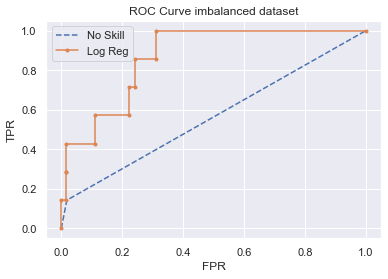

In [57]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

X, y  = make_classification(n_samples=1000, n_classes=2, weights=[.99, .01], random_state=1)
# stratify y will keep the calss imbalance once split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2, stratify=y)

#summarize dataset
print(f'Dataset: Class_0={len(y[y==0])} Class_1={len(y[y==1])}')
print(f'Train: Class_0={len(y_train[y_train==0])} Class_1={len(y_train[y_train==1])}')
print(f'Test: Class_0={len(y_test[y_test==0])} Class_1={len(y_test[y_test==1])}')

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_hat = model.predict_proba(X_test)
model_prob = y_hat[:, 1]
roc_auc = roc_auc_score(y_test, model_prob)
print(f"Log Reg PR roc_auc score {roc_auc :.3f}")

model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
y_hat = model.predict_proba(X_test)
naive_prob = y_hat[:, 1]
roc_auc = roc_auc_score(y_test, naive_prob)
print(f"Dummy Classifier Reg PR roc_auc score {roc_auc :.3f}")

def plot_roc_curve(y_test, naive_prob, model_prob):
    fpr, tpr, _ = roc_curve(y_test, naive_prob)
    # naive
    pyplot.plot(fpr, tpr, linestyle='--', label = 'No Skill')
    # plot model roc curve
    fpr, tpr, _ = roc_curve(y_test, model_prob)
    pyplot.plot(fpr, tpr, marker='.', label = 'Log Reg')
    pyplot.xlabel('FPR')
    pyplot.ylabel('TPR')
    pyplot.title('ROC Curve imbalanced dataset')
    pyplot.legend()    
    
plot_roc_curve(y_test=y_test, naive_prob=naive_prob, model_prob=model_prob)

The results for ROC Curve show the logistic Regression classifier presents some skills despite the class imbalance. As expected no skill dummy classifier roc auc approx 0.5. 

Now let's review the same imbalanced dataset under the Precision recall AUC and curve

AUC Dummy classifier 0.107
AUC Log Reg classifier 0.228


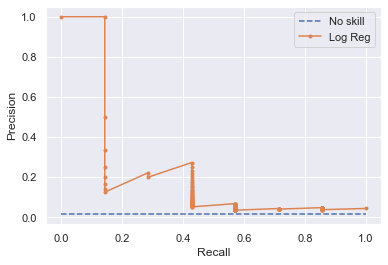

In [58]:
from sklearn.datasets import make_classification
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, auc

def plot_pr_curve(y_test, model_prob):
    # calculate the no skill line of the positvi class
    no_skill = y_test[y_test==1].shape[0] / y_test.shape[0] 
    pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No skill')
    precision, recall, _ = precision_recall_curve(y_test, model_prob)
    pyplot.plot(recall, precision, marker='.', label='Log Reg')
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.legend()
    
X, y  = make_classification(n_samples=1000, n_classes=2, weights=[.99, .01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 2, stratify=y)


model = DummyClassifier(strategy='stratified')
model.fit(X_train, y_train)
y_hat = model.predict_proba(X_test)
dummy_prob = y_hat[:, 1]
precision, recall, _ = precision_recall_curve(y_test, dummy_prob)
auc_score = auc(recall, precision)
print(f'AUC Dummy classifier {auc_score:.3f}')

model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_hat = model.predict_proba(X_test)
model_prob = y_hat[:, 1]
precision, recall, _ = precision_recall_curve(y_test, model_prob)
auc_score = auc(recall, precision)
print(f'AUC Log Reg classifier {auc_score:.3f}')

plot_pr_curve(y_test = y_test, model_prob=model_prob)

To explain why the ROC and PR curves tell a different story, recall that the PR curve focuses on the minority class, whereas the ROC curve covers both classes.

If we use a threshold of 0.5 and use the logistic regression model to make a prediction for all examples in the test set, we see that it predicts class 0 or the majority class in all cases.  This can be confirmed by using the fit model to predict crisp class labels that will use the default threshold of 0.5.  The distribution of predicted class labels can then be summarized.

In [59]:
from collections import Counter
y_hat = model.predict(X_test)
Counter(y_hat)

Counter({0: 500})

We can verify the predicted prob of the positive class to confirm the mass of probability is below 0.5 and therefore mapped to class 0. 

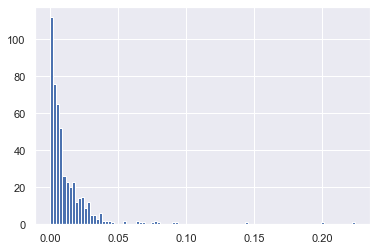

In [60]:
pyplot.hist(model_prob, bins = 100);

### Summary

In  this  tutorial,  you  discovered  ROC  Curves  and  Precision-Recall  Curves  for  imbalancedclassification.  Specifically, you learned:

- ROC Curves and Precision-Recall Curves provide a diagnostic tool for binary classification models.
- ROC AUC and Precision-Recall AUC provide scores that summarize the curves and can be used to compare classifiers.
- ROC  Curves  and  ROC  AUC  can  be  optimistic  on  severely  imbalanced  classification problems with few samples of the minority class.

### Probability metrics

Classification predictive modeling involves predicting a class label for an example.  On some problems, a crisp class label is not required, and instead a probability of class membership is preferred.  The probability summarizes the likelihood (or uncertainty) of an example belonging to each class label.  Probabilities are more nuanced and can be interpreted by a human operator or a system in decision making.
In practice, a dataset will not have target probabilities.  Instead, it will have class labels.

Probability metrics will summarize how well the predicted distribution of class membership matches the known class probability distribution.  This focus on predicted probabilities may mean that the crisp class labels predicted by a model are ignored.  This focus may mean that a model that predicts probabilities may appear to have terrible performance when evaluated according to its crisp class labels, such as using accuracy or a similar score.  This is because although the predicted probabilities may show skill, they must be interpreted with a threshold prior to being converted into crisp class labels.

Additionally, the focus on predicted probabilities may also require that the probabilities predicted by some nonlinear models to be calibrated prior to being used or evaluated.  Some models will learn calibrated probabilities as part of the training process (e.g.  logistic regression),but many will not and will require calibration (e.g.  support vector machines, decision trees, and neural networks).

A given probability metric is typically calculated for each example, then averaged across all examples  in  the  training  dataset.   There  are  two  popular  metrics  for  evaluating  predicted probabilities; they are:

- Log Loss
- Brier Score

#### Log Loss

Logarithmic loss or log loss for short is a loss function known for training the logistic regression classification algorithm.  The log loss function calculates the negative log likelihood for probability predictions made by the binary classification model.  Most notably, this is logistic regression,but this function can be used by other models, such as neural networks, and is known by other names,  such as cross-entropy.  Generally,  the log loss can be calculated using the expected probabilities P for each class and the natural logarithm of the predicted probabilities Q for each class:

    LogLoss =−(P(class= 0)×log(Q(class= 0)) + (P(class= 1))×log(Q(class= 1))) 

The best possible log loss is 0.0, and values are positive to infinite for progressively worses cores.  If you are just predicting the probability for the positive class, then the log loss function can be calculated for one binary classification prediction (yhat) compared to the expected probability (y) as follows:


    LogLoss =−((1−y)×log(1−yhat) +y×log(yhat))
    
For example, if the expected probability was 1.0 and the model predicted 0.8, the log losswould be:


    LogLoss= −((1−y)×log(1−yhat) +y×log(yhat))
           = −((1−1.0)×log(1−0.8) + 1.0×log(0.8))
           = −(0.0 +−0.223)
           =  0.223
           
           
This generalization is also known as cross-entropy and calculates the number of bits (if log base-2 is used) or nats (if log base-e is used) by which two probability distributions differ. Specifically, it builds upon the idea of entropy from information theory and calculates the average number of bits required to represent or transmit an event from one distribution compared to the other distribution.

When calculating the log loss for a set of predictions compared to a set of expected probabilities in a test dataset, the average of the log loss across all samples is calculated and reported; for example:

$ AverageLogLoss = \frac{1}{N} x \sum_{i=1}^{N} - ((1-y_{i}) x \log(1-yhat_{i}) +y_{i} x \log(yhat_{i}))$





The average log loss for a set of predictions on a training dataset is often simply referred to as the log loss.  We can demonstrate calculating log loss with a worked example.  First, let’s define a synthetic binary classification dataset, 1/100 imbalance.

In [29]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from typing import NamedTuple
from sklearn.metrics import log_loss

X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99], random_state=1, flip_y = 0)
classes = np.unique(y)
total = len(y)
for c in classes:
    n_examples = y[y==c].shape[0]
    perc = n_examples / total * 100
    print(f"Class={c} -> {n_examples} / {total} ({perc:.1f}%)")


Class=0 -> 990 / 1000 (99.0%)
Class=1 -> 10 / 1000 (1.0%)


Next, we will develop an intuition for naive predictions of probabilities.  
A naive prediction strategy would be to predict certainty for the majority class, or P(class= 0) = 1.  An alternative strategy would be to predict the minority class, or P(class= 1) = 1.  Log loss can be calculated using the logloss() scikit-learn function.  It takes the predicted probability for each class as input and returns the average log loss.  Specifically, each example must have a prediction with one probability per class, meaning a prediction for one example for a binary classification problem must have a probability for class 0 and class 1

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# no skill prediction 0
n_samples = len(y_test)

class prediction(NamedTuple):
    negative_p: int
    positive_p: int

# naive predict all as negative 0 
probs = [prediction(negative_p=1, positive_p=0) for _ in range(n_samples)]
avglogloss = log_loss(y_true = y_test, y_pred= probs)
print(f"naive prediction 0: {avglogloss:.2f}")
# naive predict all as positive 1
probs = [prediction(negative_p=0, positive_p=1) for _ in range(n_samples)]
avglogloss = log_loss(y_true = y_test, y_pred= probs)
print(f"naive prediction 1: {avglogloss:.2f}")
# baseline probabilities
probs = [prediction(negative_p=0.99, positive_p=0.01) for _ in range(n_samples)]
avglogloss = log_loss(y_true = y_test, y_pred= probs)
print(f"baseline probability: {avglogloss:.2f}")
# perfect prob
avglogloss = log_loss(y_true = y_test, y_pred=y_test)
print(f"perfect probability: {avglogloss:.2f}")

naive prediction 0: 0.35
naive prediction 1: 34.19
baseline probability: 0.06
perfect probability: 0.00


Running the example reports the log loss for each naive strategy.  As expected, predicting certainty for each class label is punished with large log loss scores, with the case of being certain for the minority class in all cases resulting in a much larger score.  We can see that predicting the distribution of examples in the dataset as the baseline results in a better score than either of the other naive measures.  
This baseline represents the no skill classifier and log loss scores. Finally, we can see that a log loss for perfectly predicted probabilities is 0.0, indicating no difference between actual and predicted probability distributions.

### Brier score

The Brier score, named for Glenn Brier, calculates the mean squared error between predicted probabilities and the expected values.  The score summarizes the magnitude of the error in the predicted probabilities and is designed for binary classification problems.  It is focused one valuating the probabilities for the positive class.  Nevertheless, it can be adapted for problems with multiple classes.  It is also an appropriate probabilistic metric for imbalanced classification problems.

*The evaluation of probabilistic scores is generally performed by means of the BrierScore.  The basic idea is to compute the mean squared error (MSE) between predictedprobability scores and the true class indicator, where the positive class is coded as 1,and negative class 0*— Page 57,Learning from Imbalanced Data Sets, 2018.

The Brier scores can become very small and the focus will be on fractions well below the decimal point.  For example, the difference in the above example between Baseline and Perfectscores is slight at four decimal places.  A common practice is to transform the score using a reference score, such as the no skill classifier.  This is called a Brier Skill Score, or BSS, and is calculated as follows:
    

In [39]:
# brier skill score for naive probability predictions.
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import brier_score_loss

# calculate the brier skill score
def brier_skill_score(y, yhat, brier_ref):
	# calculate the brier score
	bs = brier_score_loss(y, yhat)
	# calculate skill score
	return 1.0 - (bs / brier_ref)

# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99], flip_y=0, random_state=1)
# split into train/test sets with same class ratio
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2, stratify=y)
# calculate reference
probabilities = [0.01 for _ in range(len(testy))]
brier_ref = brier_score_loss(testy, probabilities)
print('Reference: Brier Score=%.4f' % (brier_ref))
# no skill prediction 0
probabilities = [0.0 for _ in range(len(testy))]
bss = brier_skill_score(testy, probabilities, brier_ref)
print('P(class1=0): BSS=%.4f' % (bss))
# no skill prediction 1
probabilities = [1.0 for _ in range(len(testy))]
bss = brier_skill_score(testy, probabilities, brier_ref)
print('P(class1=1): BSS=%.4f' % (bss))
# baseline probabilities
probabilities = [0.01 for _ in range(len(testy))]
bss = brier_skill_score(testy, probabilities, brier_ref)
print('Baseline: BSS=%.4f' % (bss))
# perfect probabilities
bss = brier_skill_score(testy, testy, brier_ref)
print('Perfect: BSS=%.4f' % (bss))

Reference: Brier Score=0.0099
P(class1=0): BSS=-0.0101
P(class1=1): BSS=-99.0000
Baseline: BSS=0.0000
Perfect: BSS=1.0000


Running the example first calculates the reference Brier score used in the BSS calculation. We can then see that predicting certainty scores for each class results in a negative BSS score,indicating that they are worse than no skill.  Finally, we can see that evaluating the reference forecast itself results in 0.0, indicating no skill and evaluating the true values as predictions results in a perfect score of 1.0.  As such, the Brier Skill Score is a best practice for evaluating probability predictions and is widely used where probability classification prediction are evaluated routinely,such as in weather forecasts (e.g.  rain or not)


### How to choose the evaluation metrics

There is an enormous number of model evaluation metrics to choose from.  Given that choosing an evaluation metric is so important and there are tens or perhaps hundreds of metrics to choosefrom, what are you supposed to do?

*The correct evaluation of learned models is one of the most important issues inpattern recognition.*—An Experimental Comparison Of Performance Measures For Classification, 2008.

Perhaps the best approach is to talk to project stakeholders and figure out what is important about a model or set of predictions.  Then select a few metrics that seem to capture what is important, then test the metric with different scenarios.  A scenario might be a mock set of predictions for a test dataset with a skewed class distribution that matches your problem domain.  You can test what happens to the metric if a model predicts all the majority class, all the minority class, does well, does poorly, and so on.  A few small tests can rapidly help you get a feeling for how the metric might perform. Another approach might be to perform a literature review and discover what metrics are most commonly used by other practitioners or academics working on the same general type of problem.  This can often be insightful, but be warned that some fields of study may fall into groupthink and adopt a metric that might be excellent for comparing large numbers of models at scale, but terrible for model selection in practice.

Still have no idea?  Here are some first-order suggestions:

!['test'](reference/metric_selection.jpg)